# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Flux
using Plots
using StatsBase
using MLJ: confusion_matrix

include("../../lib.jl")

ENV["LINES"]=30;

In [2]:
mkdir("./Figures")

LoadError: IOError: mkdir: file already exists (EEXIST)

# Datasets

In [3]:
data = CSV.read("data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


In [4]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


Look at class labels to see if dataset is imbalanced

In [5]:
label_counts = countmap(data[:Class])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [6]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [7]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [8]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [9]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([465, 562, 278, 619, 161, 972, 782, 321, 537, 760  …  12, 913, 471, 13, 1006, 802, 112, 840, 744, 261], [196, 586, 245, 77, 1028, 432, 215, 987, 137, 411  …  975, 610, 886, 848, 731, 1024, 805, 500, 659, 415])

In [10]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [11]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

In [12]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @560.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [13]:
models(matching(X,y))

6-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )

In [14]:
@load NeuralNetworkClassifier verbosity=2

import MLJFlux ✔
import 

┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70


MLJFlux ✔


NeuralNetworkClassifier(
    builder = Short(
            n_hidden = 0,
            dropout = 0.5,
            σ = NNlib.σ),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @433

## Neural networks
* Use favorite kind of network and training algorithm. 
* You may use networks of nodes with as many layers as you like and any activation function you see fit.

1. https://github.com/alan-turing-institute/MLJFlux.jl/blob/master/examples/boston.ipynb
1. https://github.com/alan-turing-institute/MLJFlux.jl
1. https://alan-turing-institute.github.io/MLJ.jl/dev/transformers/

In [15]:
# Define a custom network
mutable struct CustomNN <:MLJFlux.Builder
    n1 ::Int
end

In [16]:
function MLJFlux.build(nn::CustomNN, n_in, n_out)
    return Chain(
        Flux.Dense(n_in, nn.n1, σ),
        Flux.Dense(nn.n1, n_out, σ)
    )
end

In [17]:
layer1 = 80

80

In [18]:
batch_sz = 16;

In [19]:
max_epochs = 1000;

### No-preprocessing

In [20]:
nn = NeuralNetworkClassifier(builder=CustomNN(layer1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 80),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @814

In [21]:
Net = machine(nn, X, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @814`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @590 trained 0 times.
  args: 
    1:	Source @144 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @632 ⏎ `AbstractArray{Multiclass{2},1}`


In [22]:
nn.optimiser.eta = 0.001
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [23]:
fit!(Net, rows=train, verbosity=2)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @590.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Loss is 0.6156
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5825
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5458
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5216
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5052
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4937
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4848
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4782
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4727
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.46

Machine{NeuralNetworkClassifier{CustomNN,…}} @590 trained 1 time.
  args: 
    1:	Source @144 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @632 ⏎ `AbstractArray{Multiclass{2},1}`


In [24]:
nn.optimiser.eta = nn.optimiser.eta / 3
nn.epochs = nn.epochs + 40

100

In [25]:
fit!(Net, rows=train, verbosity=2)

┌ Info: Updating Machine{NeuralNetworkClassifier{CustomNN,…}} @590.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:320
┌ Info: Loss is 0.4185
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4175
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4173
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4171
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4169
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4167
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4166
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4164
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4162
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.41

Machine{NeuralNetworkClassifier{CustomNN,…}} @590 trained 2 times.
  args: 
    1:	Source @144 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @632 ⏎ `AbstractArray{Multiclass{2},1}`


In [26]:
nn_acc = evaluate!(Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:15


┌───────────────┬───────────────┬──────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                       │
├───────────────┼───────────────┼──────────────────────────────────────────────────┤
│ cross_entropy │ 0.443         │ Float32[0.442, 0.456, 0.43, 0.434, 0.455, 0.441] │
│ acc           │ 0.864         │ [0.869, 0.83, 0.892, 0.892, 0.852, 0.851]        │
└───────────────┴───────────────┴──────────────────────────────────────────────────┘
_.per_observation = [[[0.39, 0.313, ..., 0.313], [0.347, 0.315, ..., 0.314], [0.316, 0.362, ..., 0.365], [0.959, 0.757, ..., 0.485], [0.317, 0.314, ..., 1.11], [0.493, 1.31, ..., 0.322]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [27]:
fitted_params(Net)

(chain = Chain(Chain(Dense(41, 80, σ), Dense(80, 2, σ)), softmax),)

In [28]:
report(Net)

(training_losses = Any[0.6406213f0, 0.6206517f0, 0.6049803f0, 0.5884907f0, 0.57458246f0, 0.5601256f0, 0.548999f0, 0.53952265f0, 0.5310291f0, 0.5234257f0  …  0.42942345f0, 0.42916226f0, 0.42890486f0, 0.42865133f0, 0.42840067f0, 0.42815146f0, 0.42790288f0, 0.4276587f0, 0.4274199f0, 0.42718524f0],)

### With Preprocessing

Standardizing Inputs makes a huge difference.
Before, I could only barely break below 0.4 training loss, but by standardizing inputs, I can easily get near 0.3.

In [29]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @814`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @236 trained 0 times.
  args: 
    1:	Source @122 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @923 ⏎ `AbstractArray{Multiclass{2},1}`


### Learning Curve

In [30]:
Net.model.epochs = max_epochs
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @236.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:14


Machine{NeuralNetworkClassifier{CustomNN,…}} @236 trained 1 time.
  args: 
    1:	Source @122 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @923 ⏎ `AbstractArray{Multiclass{2},1}`


In [31]:
nn_acc = evaluate!(Net, resampling=Holdout(), measure=[cross_entropy, acc], verbosity=1)

┌───────────────┬───────────────┬────────────────┐
│ _.measure     │ _.measurement │ _.per_fold     │
├───────────────┼───────────────┼────────────────┤
│ cross_entropy │ 0.465         │ Float32[0.465] │
│ acc           │ 0.845         │ [0.845]        │
└───────────────┴───────────────┴────────────────┘
_.per_observation = [[[0.313, 0.313, ..., 0.313]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [32]:
vals = collect(0:5:max_epochs)
r = range(nn, :epochs, lower=1, upper=max_epochs, scale=:log10)

MLJBase.NumericRange(Int64, :epochs, ... )

In [33]:
curve = MLJ.learning_curve(Net, 
                        range=r, 
                        resampling=Holdout(fraction_train=0.7), 
#                         resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @842.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 27 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @747`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 27 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @061`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abstra

(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 7, 9, 11, 14, 17  …  117, 149, 189, 240, 304, 386, 489, 621, 788, 1000],
 measurements = [0.7376055717468262, 0.7221724390983582, 0.7065893411636353, 0.6914002299308777, 0.6770412921905518, 0.6132303476333618, 0.5784444808959961, 0.5588062405586243, 0.5359548926353455, 0.5247332453727722  …  0.46344730257987976, 0.4609600305557251, 0.45896366238594055, 0.4574935734272003, 0.45691561698913574, 0.4564707279205322, 0.4541047513484955, 0.4534625709056854, 0.457048237323761, 0.46283984184265137],)

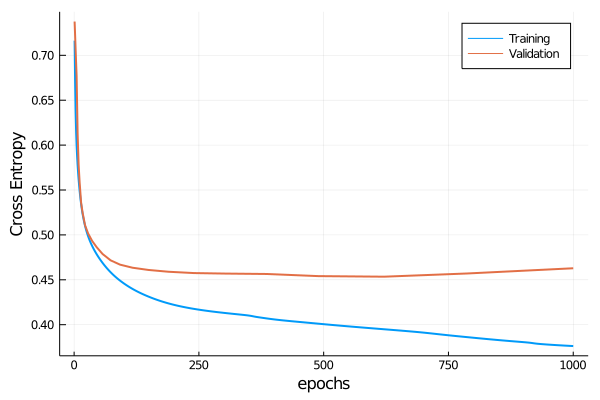

In [34]:
plot(Net.report.training_losses, label="Training", lw=2)
plot!(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)


In [35]:
a = round(nn.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

(0.00033, 0.45346, 621)

### GridSearch for Hidden Layer Size 1

In [36]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @814`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @742 trained 0 times.
  args: 
    1:	Source @187 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @581 ⏎ `AbstractArray{Multiclass{2},1}`


In [37]:
param1 = :epochs
param2 = :(builder.n1)

r1 = range(nn, param1, lower=10, upper=max_epochs, scale=:log10)
# r1 = range(nn, param1, lower=1, upper=100, scale=:linear)
r2 = range(nn, param2, lower=50, upper=150, scale=:linear)

MLJBase.NumericRange(Int64, :(builder.n1), ... )

In [38]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=144),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @787,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.0003333333333333333, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 1000,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 144,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Int64,MLJBase.Bounded,Symbol}[NumericRange{Int64,…} @416, NumericRange{Int64,…} @159],
    train_best = true,
    repeats = 1,
   

In [39]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @863`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @428 trained 0 times.
  args: 
    1:	Source @127 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @006 ⏎ `AbstractArray{Multiclass{2},1}`


In [40]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @428.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 144 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @693`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 144 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @432`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abst

Machine{ProbabilisticTunedModel{Grid,…}} @428 trained 1 time.
  args: 
    1:	Source @127 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @006 ⏎ `AbstractArray{Multiclass{2},1}`


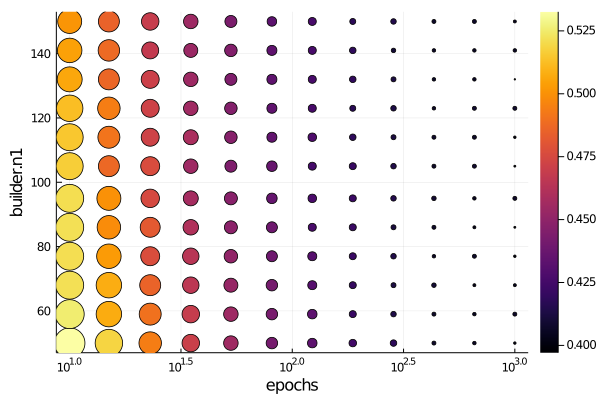

In [41]:
plot(self_tuning_nn)

In [42]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @694,
 best_fitted_params = (chain = Chain(Chain(Dense(41, 132, σ), Dense(132, 2, σ)), softmax),),)

In [43]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 132),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.0003333333333333333, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 1000,
    batch_size = 16,
    lambda = 0.01,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @694

In [44]:
best_loss = z.report.best_result.measurement[1]

0.39708996f0

In [45]:
best_n1 = best.best_model.builder.n1

132

### GridSearch for Learning Rate

In [46]:
nn = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 132),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @730

In [47]:
nn.optimiser.eta = 0.001
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [48]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @730`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @345 trained 0 times.
  args: 
    1:	Source @665 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @703 ⏎ `AbstractArray{Multiclass{2},1}`


In [49]:
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @345.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:01


Machine{NeuralNetworkClassifier{CustomNN,…}} @345 trained 1 time.
  args: 
    1:	Source @665 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @703 ⏎ `AbstractArray{Multiclass{2},1}`


In [50]:
param1 = :epochs
param2 = :(optimiser.eta)

r1 = range(nn, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(nn, param2, lower=0.0001, upper=1, scale=:log10)

MLJBase.NumericRange(Float64, :(optimiser.eta), ... )

In [51]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=300),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @874,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 60,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 300,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Int64,…} @024, NumericRange{Float64,…} @275],
    train_best = true,
    repeats = 1,
    n = nothing

In [52]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @482 trained 0 times.
  args: 
    1:	Source @281 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @305 ⏎ `AbstractArray{Multiclass{2},1}`


In [53]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @482.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 289 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @858`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 289 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @497`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abst

Machine{ProbabilisticTunedModel{Grid,…}} @482 trained 1 time.
  args: 
    1:	Source @281 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @305 ⏎ `AbstractArray{Multiclass{2},1}`


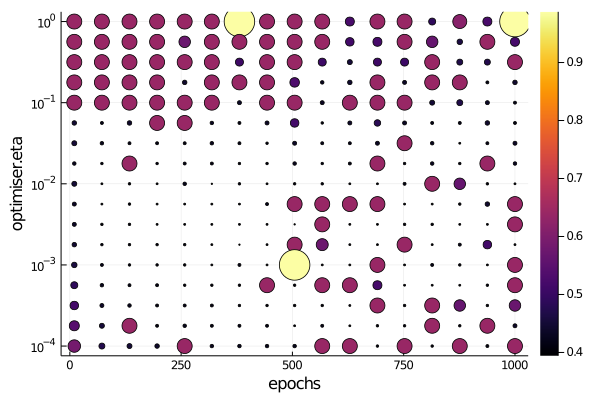

In [54]:
plot(self_tuning_nn)

In [55]:
fn = "Figures/NN_MCC_LR"
png(replace(fn,'.' => ','))

In [56]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @741,
 best_fitted_params = (chain = Chain(Chain(Dense(41, 132, σ), Dense(132, 2, σ)), softmax),),)

In [57]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 132),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.01, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 319,
    batch_size = 16,
    lambda = 0.01,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @741

In [58]:
best_loss = z.report.best_result.measurement[1]

0.39424562f0

In [59]:
best_eta = round(best.best_model.optimiser.eta, digits=5)

0.01

In [60]:
best_epochs = best.best_model.epochs

319

### GridSearch for Regularization

In [61]:
nn = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 132),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @819

In [62]:
nn.optimiser.eta = best_eta
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [63]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @819`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @729 trained 0 times.
  args: 
    1:	Source @455 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @742 ⏎ `AbstractArray{Multiclass{2},1}`


In [64]:
param1 = :epochs
param2 = :lambda

r1 = range(nn, param1, lower=100, upper=max_epochs, scale=:linear)
r2 = range(nn, param2, lower=0.0001, upper=1, scale=:log10)

MLJBase.NumericRange(Float64, :lambda, ... )

In [65]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=100),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @468,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.01, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 60,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 100,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Int64,…} @034, NumericRange{Float64,…} @889],
    train_best = true,
    repeats = 1,
    n = nothing,

In [66]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @343`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @969 trained 0 times.
  args: 
    1:	Source @308 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @492 ⏎ `AbstractArray{Multiclass{2},1}`


In [67]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @969.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @679`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @101`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abst

Machine{ProbabilisticTunedModel{Grid,…}} @969 trained 1 time.
  args: 
    1:	Source @308 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @492 ⏎ `AbstractArray{Multiclass{2},1}`


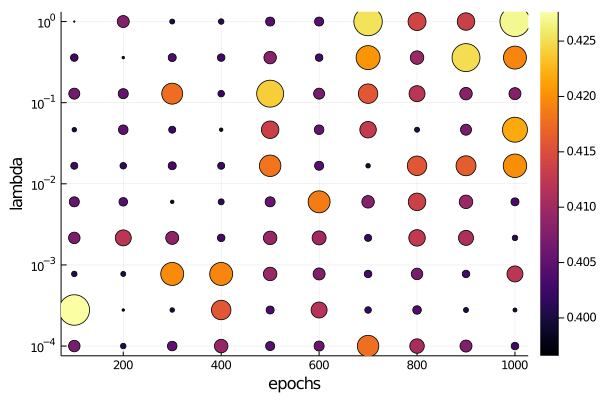

In [68]:
plot(self_tuning_nn)

In [69]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @622,
 best_fitted_params = (chain = Chain(Chain(Dense(41, 132, σ), Dense(132, 2, σ)), softmax),),)

In [70]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 132),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.01, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 100,
    batch_size = 16,
    lambda = 1.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @622

In [71]:
best_loss = z.report.best_result.measurement[1]

0.396581f0

In [72]:
best_lambda = best.best_model.lambda

1.0

### Learning Curve

In [115]:
lc_model = NeuralNetworkClassifier(builder=CustomNN(best_n1)) #70
lc_model.optimiser.eta = best_eta; #0.003
lc_model.lambda = best_lambda #0.01
lc_model.epochs = best_epochs #130
lc_model.batch_size = batch_sz #32
lc_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 132),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.01, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 210,
    batch_size = 16,
    lambda = 1.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @717

In [116]:
data_schedule, training_losses, valid_losses = learn_curve(lc_model, X[train,:], y[train], acc, step=5)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (10, 0.9, 0.7027027027027027)
(d, train_metric, valid_metric) = (15, 1.0, 0.722972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (20, 1.0, 0.722972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (25, 1.0, 0.7297297297297297)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (30, 1.0, 0.7567567567567568)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (35, 1.0, 0.7567567567567568)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (40, 1.0, 0.7702702702702703)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (45, 1.0, 0.7702702702702703)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (50, 1.0, 0.75)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (55, 0.9818181818181818, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (60, 1.0, 0.7702702702702703)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (65, 0.9846153846153847, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (70, 0.9571428571428572, 0.7567567567567568)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (75, 0.96, 0.7702702702702703)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (80, 0.9625, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (85, 0.9647058823529412, 0.7297297297297297)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (90, 0.9555555555555556, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (95, 0.9578947368421052, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (100, 0.96, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (105, 0.9619047619047619, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (110, 0.9636363636363636, 0.7837837837837838)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (115, 0.9652173913043478, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (120, 0.9583333333333334, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (125, 0.952, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (130, 0.9538461538461539, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (135, 0.9629629629629629, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (140, 0.9642857142857143, 0.7972972972972973)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (145, 0.9655172413793104, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (150, 0.96, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (155, 0.9548387096774194, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (160, 0.95625, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (165, 0.9575757575757575, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (170, 0.9647058823529412, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (175, 0.9485714285714286, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (180, 0.9666666666666667, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (185, 0.9567567567567568, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (190, 0.9578947368421052, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (195, 0.9487179487179487, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (200, 0.955, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (205, 0.9609756097560975, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (210, 0.9571428571428572, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (215, 0.9441860465116279, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (220, 0.9545454545454546, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (225, 0.9555555555555556, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (230, 0.9478260869565217, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (235, 0.9531914893617022, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (240, 0.9083333333333333, 0.777027027027027)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (245, 0.9591836734693877, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (250, 0.952, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (255, 0.9568627450980393, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (260, 0.9653846153846154, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (265, 0.9547169811320755, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (270, 0.9555555555555556, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (275, 0.9672727272727273, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (280, 0.9678571428571429, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (285, 0.9649122807017544, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (290, 0.9551724137931035, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (295, 0.9457627118644067, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (300, 0.97, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (305, 0.9606557377049181, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (310, 0.967741935483871, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (315, 0.9714285714285714, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (320, 0.975, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (325, 0.9661538461538461, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (330, 0.9606060606060606, 0.8918918918918919)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (335, 0.9641791044776119, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (340, 0.9735294117647059, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (345, 0.9710144927536232, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (350, 0.9628571428571429, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (355, 0.971830985915493, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (360, 0.9694444444444444, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (365, 0.9698630136986301, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (370, 0.9702702702702702, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (375, 0.9546666666666667, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (380, 0.9421052631578948, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (385, 0.9688311688311688, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (390, 0.9717948717948718, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (395, 0.959493670886076, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (400, 0.97, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (405, 0.9679012345679012, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (410, 0.9439024390243902, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (415, 0.9253012048192771, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (420, 0.9714285714285714, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (425, 0.8423529411764706, 0.8243243243243243)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (430, 0.9604651162790697, 0.9121621621621622)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (435, 0.9724137931034482, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (440, 0.9409090909090909, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (445, 0.9617977528089887, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (450, 0.9511111111111111, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (455, 0.9758241758241758, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (460, 0.9760869565217392, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (465, 0.978494623655914, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (470, 0.9702127659574468, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (475, 0.9578947368421052, 0.8918918918918919)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (480, 0.9604166666666667, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (485, 0.9463917525773196, 0.831081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (490, 0.9285714285714286, 0.8175675675675675)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (495, 0.9212121212121213, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (500, 0.94, 0.8581081081081081)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (505, 0.9623762376237623, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (510, 0.9568627450980393, 0.8918918918918919)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (515, 0.9553398058252427, 0.7905405405405406)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (520, 0.9615384615384616, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (525, 0.9676190476190476, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (530, 0.9641509433962264, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (535, 0.9532710280373832, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (540, 0.9574074074074074, 0.8378378378378378)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (545, 0.9596330275229358, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (550, 0.9563636363636364, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (555, 0.963963963963964, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (560, 0.9357142857142857, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (565, 0.9451327433628318, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (570, 0.968421052631579, 0.8445945945945946)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (575, 0.9686956521739131, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (580, 0.9586206896551724, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (585, 0.9504273504273504, 0.8513513513513513)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (590, 0.9576271186440678, 0.8783783783783784)


(10:5:590, Any[0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9818181818181818  …  0.9596330275229358, 0.9563636363636364, 0.963963963963964, 0.9357142857142857, 0.9451327433628318, 0.968421052631579, 0.9686956521739131, 0.9586206896551724, 0.9504273504273504, 0.9576271186440678], Any[0.7027027027027027, 0.722972972972973, 0.722972972972973, 0.7297297297297297, 0.7567567567567568, 0.7567567567567568, 0.7702702702702703, 0.7702702702702703, 0.75, 0.777027027027027  …  0.8716216216216216, 0.8648648648648649, 0.8513513513513513, 0.8513513513513513, 0.8648648648648649, 0.8445945945945946, 0.8716216216216216, 0.8783783783783784, 0.8513513513513513, 0.8783783783783784])

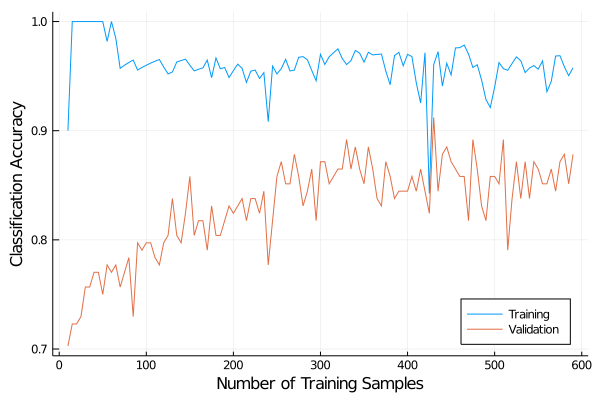

In [117]:
plot(data_schedule, training_losses, label="Training", legend=:bottomright)
plot!(data_schedule, valid_losses, label="Validation")
xlabel!("Number of Training Samples")
ylabel!("Classification Accuracy")

In [118]:
png("Figures/NN_LC")

#### Learning Curve

In [119]:
Net = machine(lc_model, X_stand, y)
Net.model.epochs = max_epochs
fit!(Net, rows=train, verbosity=1, force=true)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @717`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @121.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:18


Machine{NeuralNetworkClassifier{CustomNN,…}} @121 trained 1 time.
  args: 
    1:	Source @810 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @810 ⏎ `AbstractArray{Multiclass{2},1}`


In [120]:
nn_acc = evaluate!(Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:02:17


┌───────────────┬───────────────┬───────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                        │
├───────────────┼───────────────┼───────────────────────────────────────────────────┤
│ cross_entropy │ 0.439         │ Float32[0.435, 0.456, 0.386, 0.468, 0.442, 0.446] │
│ acc           │ 0.871         │ [0.881, 0.852, 0.926, 0.835, 0.869, 0.863]        │
└───────────────┴───────────────┴───────────────────────────────────────────────────┘
_.per_observation = [[[0.313, 0.313, ..., 0.313], [0.313, 0.313, ..., 0.313], [0.313, 0.313, ..., 0.512], [0.313, 0.313, ..., 0.313], [1.31, 1.23, ..., 0.313], [0.47, 1.31, ..., 0.313]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [121]:
r = range(nn, :epochs, lower=1, upper=max_epochs, scale=:log10)

MLJBase.NumericRange(Int64, :epochs, ... )

In [ ]:
curve = MLJ.learning_curve(Net, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses(),
                        resolution=200
)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @595.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 131 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @156`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @094`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractA

Evaluating over 131 metamodels:  11%[==>                      ]  ETA: 0:01:06┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @445`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  12%[===>                     ]  ETA: 0:01:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @623`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  13%[===> 

Evaluating over 131 metamodels:  24%[======>                  ]  ETA: 0:01:54┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @845`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  25%[======>                  ]  ETA: 0:01:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @204`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  26%[=====

Evaluating over 131 metamodels:  37%[=========>               ]  ETA: 0:02:31┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @152`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  38%[=========>               ]  ETA: 0:02:33┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @915`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  39%[=====

Evaluating over 131 metamodels:  50%[============>            ]  ETA: 0:03:04┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @058`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  51%[============>            ]  ETA: 0:03:06┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @688`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  52%[=====

Evaluating over 131 metamodels:  63%[===============>         ]  ETA: 0:03:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @573`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  64%[================>        ]  ETA: 0:03:33┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @027`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  65%[=====

Evaluating over 131 metamodels:  76%[===================>     ]  ETA: 0:03:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @629`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  77%[===================>     ]  ETA: 0:03:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @030`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 131 metamodels:  78%[=====

In [ ]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
plot!(Net.report.training_losses, label="Training", lw=2)

In [ ]:
best_epochs = curve.parameter_values[argmin(curve.measurements)]

In [ ]:
png("Figures/learning_curve_nn_$(best_epochs)epochs_balance")

# Final Results

In [ ]:
final_model = NeuralNetworkClassifier(builder=CustomNN(best_n1))

In [ ]:
final_model.optimiser.eta = lc_model.optimiser.eta = best_eta;
final_model.batch_size = batch_sz
final_model.lambda = best_lambda
final_model.epochs = best_epochs

### Test Performance

In [ ]:
Final_Net = machine(final_model, X_stand, y)

In [ ]:
fit!(Final_Net, rows=train, force=true, verbosity=1)

In [ ]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
ŷ = MLJ.predict(Final_Net, X_stand[test,:]);

In [ ]:
cross_entropy(ŷ, y[test]) |> mean

In [113]:
acc(ŷ, y[test])

0.9274447949526814

In [114]:
confusion_matrix(mode.(ŷ), y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     199     │     12      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     11      │     95      │
└─────────────┴─────────────┴─────────────┘


In [93]:
fitted_params(Final_Net)

(chain = Chain(Chain(Dense(41, 132, σ), Dense(132, 2, σ)), softmax),)

In [94]:
report(Final_Net)

(training_losses = Any[0.45760855f0, 0.4432322f0, 0.44047296f0, 0.43934405f0, 0.43470815f0, 0.43359315f0, 0.43059272f0, 0.42656052f0, 0.4221066f0, 0.42051736f0  …  0.35834074f0, 0.35877413f0, 0.35743695f0, 0.3563093f0, 0.3559019f0, 0.35592437f0, 0.35514218f0, 0.35471922f0, 0.35466245f0, 0.35458267f0],)